In [12]:
import pickle
import json
import numpy as np
from eval.matrix_approx_zeshel import plot_heat_map
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
with open('results/pro_wrestling/ment_to_ent_scores_n_m_100_n_e_10133_all_layers_False.pkl', 'rb') as f:
    res = pickle.load(f)

In [6]:
for key in res.keys():
    print(key, type(res[key]))
    print(res[key].items())

ment_to_ent_scores <class 'torch.Tensor'>


AttributeError: 'Tensor' object has no attribute 'items'

In [8]:
plot_heat_map(
    res['ment_to_ent_scores'],
    row_vals=np.arange(1, 101), 
    col_vals=np.arange(1, 101), 
    metric = 'attention',
    top_k = 100, 
    curr_res_dir = 'res/pro_wrestling'
    )

Python 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.15.0 -- An enhanced Interactive Python. Type '?' for help.










---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File ~/Yandex.Disk/Studies/NLA/ce-retrieval/eval/matrix_approx_zeshel.py:177, in plot_heat_map(val_matrix, row_vals, col_vals, metric, top_k, curr_res_dir, title, fname)
    176 if fname is None:
--> 177 	plt.savefig(f"{curr_res_dir}/{metric}_{top_k}.pdf")
    178 else:

File ~/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py:1023, in savefig(*args, **kwargs)
   1022 fig = gcf()
-> 1023 res = fig.savefig(*args, **kwargs)
   1024 fig.canvas.draw_idle()  # Need this if 'transparent=True', to reset colors.

File ~/anaconda3/lib/python3.11/site-packages/matplotlib/figure.py:3378, in Figure.savefig(self, fname, transparent, **kwargs)
  

In [3]:
with open('results/pro_wrestling/Retrieval_wrt_Exact_CrossEnc/nm=100_ne=10133_s=10/retrieval_wrt_exact_crossenc.json', 'r') as f:
    data = json.load(f)

In [37]:
data[model]['top_k=10']['k_retvr=500']['anc_n_m=50~anc_n_e=50']['all']

{'exact_vs_reranked_approx_retvr~common_mean': 10.0,
 'exact_vs_reranked_approx_retvr~common_std': 0.0,
 'exact_vs_reranked_approx_retvr~common_p50': 10.0,
 'exact_vs_reranked_approx_retvr~diff_mean': 0.0,
 'exact_vs_reranked_approx_retvr~diff_std': 0.0,
 'exact_vs_reranked_approx_retvr~diff_p50': 0.0,
 'exact_vs_reranked_approx_retvr~total_mean': 10.0,
 'exact_vs_reranked_approx_retvr~total_std': 0.0,
 'exact_vs_reranked_approx_retvr~total_p50': 10.0,
 'exact_vs_reranked_approx_retvr~common_frac_mean': 1.0,
 'exact_vs_reranked_approx_retvr~common_frac_std': 0.0,
 'exact_vs_reranked_approx_retvr~common_frac_p50': 1.0,
 'exact_vs_reranked_approx_retvr~diff_frac_mean': 0.0,
 'exact_vs_reranked_approx_retvr~diff_frac_std': 0.0,
 'exact_vs_reranked_approx_retvr~diff_frac_p50': 0.0,
 'approx_error': 0.007036604452878237,
 'approx_error_relative': 7.770815386720642e-07}

/tmp/ipykernel_3312383/4204351787.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_list, rotation=90)


Text(0, 0.5, 'exact_vs_reranked_approx_retvr~common_frac_mean')

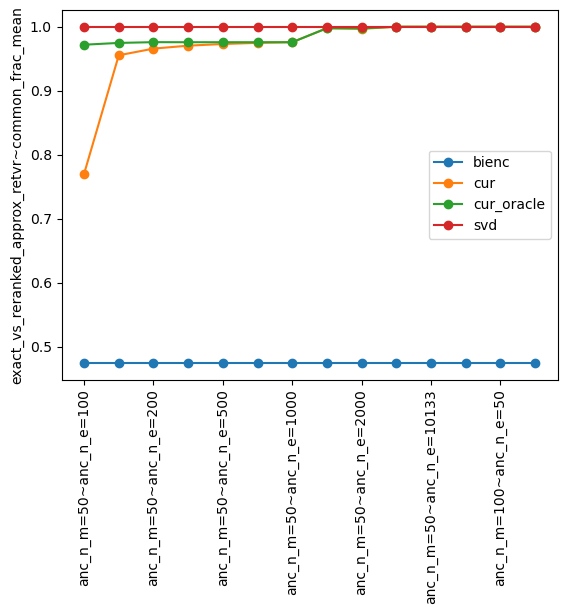

In [63]:
what = 'exact_vs_reranked_approx_retvr~common_frac_mean'

prepare = {key: [] for key in ['bienc', 'cur', 'cur_oracle', 'svd']}
version_list = []
for model in ['bienc', 'cur', 'cur_oracle', 'svd']:
    for version in data[model]['top_k=10']['k_retvr=500']:
        prepare[model] += [data[model]['top_k=10']['k_retvr=500'][version]['all'][what]]
        version_list.append(version)


fig, ax = plt.subplots()
for key in prepare:
    ax.plot(prepare[key], 'o-', label=key)

ax.legend()
ax.set_xticklabels(version_list, rotation=90)

plt.ylabel(what)

In [50]:
version_list

['a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '5',
 '0',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '1',
 '0',
 '0',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '2',
 '0',
 '0',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '5',
 '0',
 '0',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '1',
 '0',
 '0',
 '0',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '2',
 '0',
 '0',
 '0',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '5',
 '0',
 '~',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'e',
 '=',
 '1',
 '0',
 '1',
 '3',
 '3',
 'a',
 'n',
 'c',
 '_',
 'n',
 '_',
 'm',
 '=',
 '1',
 '0'